<a href="https://colab.research.google.com/github/mingmcs/pyhealth/blob/week3/Tutorial_1_pyhealth_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyhealth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 7.9 MB/s 
     |████████████████████████████████| 29.3 MB 1.3 MB/s 


### **Instruction on [pyhealth.datasets](https://pyhealth.readthedocs.io/en/latest/api/datasets.html) (e.g., MIMIC-III, MIMIC-IV, eICU, OMOP-CDM)**
- **[README]**: This module is used to process the unstructured raw data into a structured dataset object. The process will not drop any information. 
- **[Arguments]**: 
  - `root` is the arguments directing to the data folder, e.g., "mimiciii/1.4/".
  - `tables` is a list of table names from raw databases, which specifies the information that will be used in building your dataset.
  - `code_mapping [default: None]` asks a directionary input, specifying the new coding systems for each data table. For example, `{"NDC": ("ATC", {"target_kwargs": {"level": 3}})},` means that our pyhealth will automatically change the codings from `NDC` into `ATC-3` level for tables if any. Look up [here](https://pyhealth.readthedocs.io/en/latest/api/medcode.html#diagnosis-codes) and check which code transforms are supported.
  - ``dev``: whether to enable dev mode (only use a small subset of the data)
  Default is False.
  - ``refresh_cache``: whether to refresh the cache; if true, the dataset will be processed from scratch and the cache will be updated. Default is False.      
 
- **[Functionality]**: currently, we provide the api for:
  - [MIMIC3Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC3Dataset.html)
  - [MIMIC4Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC4Dataset.html)
  - [eICUDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.eICUDataset.html)
  - [OMOPDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.OMOPDataset.html): any OMOP-CDM based databases.

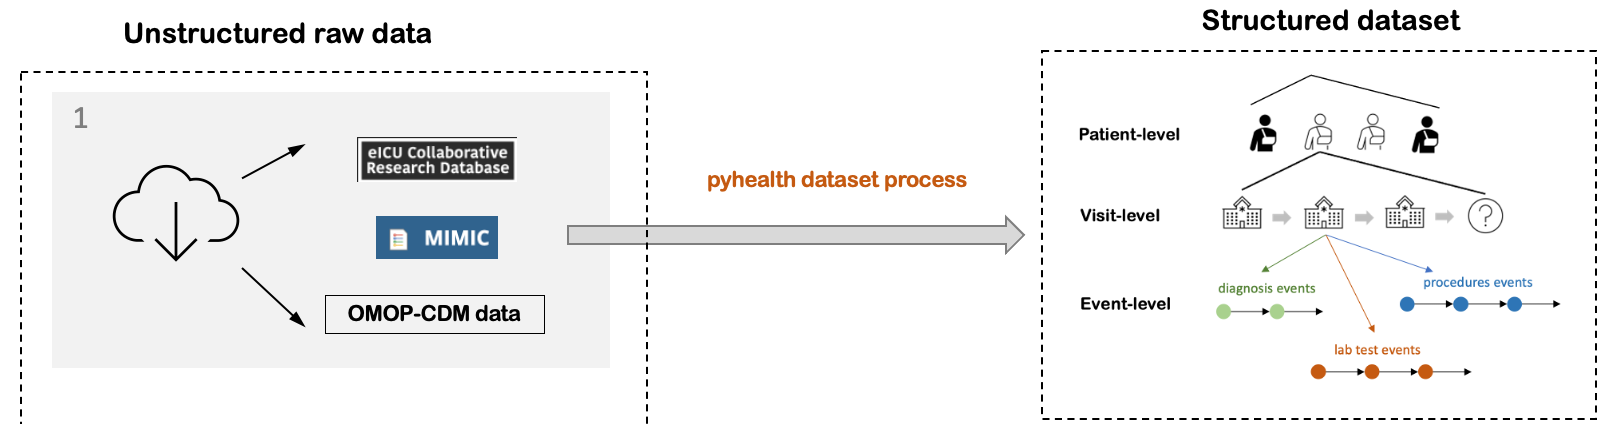

### **Example 1: MIMIC-III**
- **[Initialize]:** In this example, we load the MIMIC-III data by [pyhealth.datasets.MIMIC3Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC3Dataset.html). 

  - The root of this datasets is in (we use a synthetic MIMIC-III for demo)
    - `https://storage.googleapis.com/pyhealth/Synthetic_MIMIC-III/`.
  - For each patient's ICU stay, user wants to obtain the `DIAGNOSES_ICD`, and `PROCEDURES_ICD` tables. **Note that, different databases have different raw table names**.
  - Further, user wants to `map the ICD9CM codes into CCSCM codes` for ease of downstream prediction applications.



In [ ]:
from pyhealth.datasets import MIMIC3Dataset

mimic3_ds = MIMIC3Dataset(
    # Argument 1: It specifies the data folder root.
    root="https://storage.googleapis.com/pyhealth/Synthetic_MIMIC-III/", 
    
    # Argument 2: The users need to input a list of raw table names (e.g., DIAGNOSES_ICD.csv, PROCEDURES_ICD.csv).
    tables=["DIAGNOSES_ICD", "PROCEDURES_ICD"],
    
    # Argument 3: This argument input a dictionary (key is the source code 
    # vocabulary and value is the target code vocabulary . 
    # Default is empty dict, which means the original code will be used.
    code_mapping={"ICD9CM": "CCSCM"},
)

Mapping codes: 100%|██████████| 49993/49993 [00:11<00:00, 4218.19it/s]


- **[Output]:** user can check the output by calling the `.info()` function. The output `mimics_ds.patients` is a dict structure, key is the `patient_id` and the value is [Patient](https://pyhealth.readthedocs.io/en/latest/api/data/pyhealth.data.Patient.html) object. 

In [ ]:
mimic3_ds.info()


dataset.patients: patient_id -> <Patient>

<Patient>
    - visits: visit_id -> <Visit> 
    - other patient-level info
    
    <Visit>
        - event_list_dict: table_name -> List[Event]
        - other visit-level info
    
        <Event>
            - code: str
            - other event-level info



In [ ]:
# You can find the list of all available tables in this dataset as
mimic3_ds.available_tables

['DIAGNOSES_ICD', 'PROCEDURES_ICD']

In [ ]:
# You can also print the statistics of the entire dataset.
mimic3_ds.stat()


Statistics of base dataset (dev=False):
	- Dataset: MIMIC3Dataset
	- Number of patients: 49993
	- Number of visits: 52769
	- Number of visits per patient: 1.0555
	- Number of events per visit in DIAGNOSES_ICD: 9.1038
	- Number of events per visit in PROCEDURES_ICD: 3.2186



'\nStatistics of base dataset (dev=False):\n\t- Dataset: MIMIC3Dataset\n\t- Number of patients: 49993\n\t- Number of visits: 52769\n\t- Number of visits per patient: 1.0555\n\t- Number of events per visit in DIAGNOSES_ICD: 9.1038\n\t- Number of events per visit in PROCEDURES_ICD: 3.2186\n'

### Let us do some explorations



In [ ]:
# get patient dictionary
patient_dict = mimic3_ds.patients
print(list(patient_dict.keys())[:10])

['1', '10', '100', '1000', '10000', '10001', '10002', '10003', '10004', '10005']


In [ ]:
# get the "10005" patient
patient = patient_dict["1005"]
patient.gender, patient.birth_datetime

('F', datetime.datetime(1961, 9, 7, 0, 0))

In [ ]:
# get the visit list of this patient
visit_dict = patient.visits
print (list(visit_dict.keys()))

['101058']


In [ ]:
# get the first visit
visit = visit_dict['101058']
visit.encounter_time, visit.available_tables

(datetime.datetime(1962, 3, 15, 0, 0), ['DIAGNOSES_ICD', 'PROCEDURES_ICD'])

In [ ]:
# get the diagnosis information in the visit
visit.get_event_list('DIAGNOSES_ICD')

[Event with CCSCM code 98 from table DIAGNOSES_ICD,
 Event with CCSCM code 238 from table DIAGNOSES_ICD,
 Event with CCSCM code 239 from table DIAGNOSES_ICD,
 Event with CCSCM code 661 from table DIAGNOSES_ICD,
 Event with CCSCM code 52 from table DIAGNOSES_ICD,
 Event with CCSCM code 2621 from table DIAGNOSES_ICD,
 Event with CCSCM code 660 from table DIAGNOSES_ICD]

### **Example 2: OMOP-CDM**
- **[Initialize]:** In this example, we load one OMOP-CDM formatted dataset by [pyhealth.datasets.OMOPDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.OMOPDataset.html). The initialization structure is very similar to previous examples, but with standard OMOP-CDM table names.

In [ ]:
from pyhealth.datasets import OMOPDataset
omop_ds = OMOPDataset(
    root="https://storage.googleapis.com/pyhealth/synpuf1k_omop_cdm_5.2.2",
    tables=["condition_occurrence", "procedure_occurrence", "drug_exposure"],
    code_mapping={},
)

Mapping codes: 100%|██████████| 1000/1000 [00:00<00:00, 3397.32it/s]


### We can explore the information in the same way

In [ ]:
# check the info
omop_ds.info()


dataset.patients: patient_id -> <Patient>

<Patient>
    - visits: visit_id -> <Visit> 
    - other patient-level info
    
    <Visit>
        - event_list_dict: table_name -> List[Event]
        - other visit-level info
    
        <Event>
            - code: str
            - other event-level info



In [ ]:
# show the statistics
omop_ds.stat()


Statistics of base dataset (dev=False):
	- Dataset: OMOPDataset
	- Number of patients: 1000
	- Number of visits: 55261
	- Number of visits per patient: 55.2610
	- Number of events per visit in condition_occurrence: 2.6635
	- Number of events per visit in procedure_occurrence: 2.4886
	- Number of events per visit in drug_exposure: 0.1387



'\nStatistics of base dataset (dev=False):\n\t- Dataset: OMOPDataset\n\t- Number of patients: 1000\n\t- Number of visits: 55261\n\t- Number of visits per patient: 55.2610\n\t- Number of events per visit in condition_occurrence: 2.6635\n\t- Number of events per visit in procedure_occurrence: 2.4886\n\t- Number of events per visit in drug_exposure: 0.1387\n'

In [ ]:
# get patient dictionary (show the first 10 patients)
patient_dict = omop_ds.patients
print(list(patient_dict.keys())[:10])

['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1007']


In [ ]:
# get the "10005" patient
patient = patient_dict["1007"]
patient.gender, patient.birth_datetime

(8507, datetime.datetime(1937, 5, 1, 0, 0))

In [ ]:
# get the visit list of this patient
visit_dict = patient.visits
print (list(visit_dict.keys()))

['50405', '50406', '50407', '50408', '50409', '50410', '50411', '50412', '50413', '50414', '50415', '50416', '50417', '50418', '50419', '50420', '50421', '50422', '50423', '50424', '50425', '50426', '50427', '50428', '50429', '50430', '50431', '50432', '50433', '50434', '50435', '50436', '50437', '50438', '50439', '50440', '50441', '50442', '50443', '50444', '50445', '50446', '50447', '50448', '50449', '50450', '50451', '50452']


In [ ]:
# get the first visit
visit = visit_dict['50405']
visit.encounter_time, visit.available_tables

(datetime.datetime(2008, 7, 15, 0, 0),
 ['condition_occurrence', 'procedure_occurrence'])

In [ ]:
# get the diagnosis information in the visit
print (visit.get_event_list('condition_occurrence'))
print (visit.get_event_list('procedure_occurrence'))

[Event with CONDITION_CONCEPT_ID code 42872402 from table condition_occurrence, Event with CONDITION_CONCEPT_ID code 437264 from table condition_occurrence, Event with CONDITION_CONCEPT_ID code 44782733 from table condition_occurrence, Event with CONDITION_CONCEPT_ID code 443729 from table condition_occurrence, Event with CONDITION_CONCEPT_ID code 201826 from table condition_occurrence, Event with CONDITION_CONCEPT_ID code 313217 from table condition_occurrence, Event with CONDITION_CONCEPT_ID code 315831 from table condition_occurrence, Event with CONDITION_CONCEPT_ID code 316999 from table condition_occurrence, Event with CONDITION_CONCEPT_ID code 81902 from table condition_occurrence]
[Event with PROCEDURE_CONCEPT_ID code 2001430 from table procedure_occurrence]


### **MIMIC-III, MIMIC-IV, eICU datasets are not allowed to distribute**
- We do not provide more examples for them
- However, the procedures are exactly the same

### **Instruction on [pyhealth.datasets.SampleDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets.html) (users have their own processed dataset)**
- **[README]**: This module is used to load the dataset that users have processed.
- **[Args]**:
  - ``samples``: a list of samples, each sample is a dict with patient_id, visit_id, and other task-specific attributes as key.
  - ``dataset_name``: the name of the dataset. Default is None.
  - ``task_name``: the name of the task. Default is None.

- **[Attributes]**:
  - ``input_info``: Dict, a dict whose keys are the same as the keys in the samples, and values are the corresponding input information:
    - **type**: the element type of each key attribute, one of float, int, str.
    - **dim**: the list dimension of each key attribute, one of 0, 1, 2, 3.
    - **len**: the length of the vector, only valid for vector-based attributes.
  - ``patient_to_index``: Dict[str, List[int]], a dict mapping patient_id to a list of sample indices.
  - ``visit_to_index``: Dict[str, List[int]], a dict mapping visit_id to a list of sample indices.

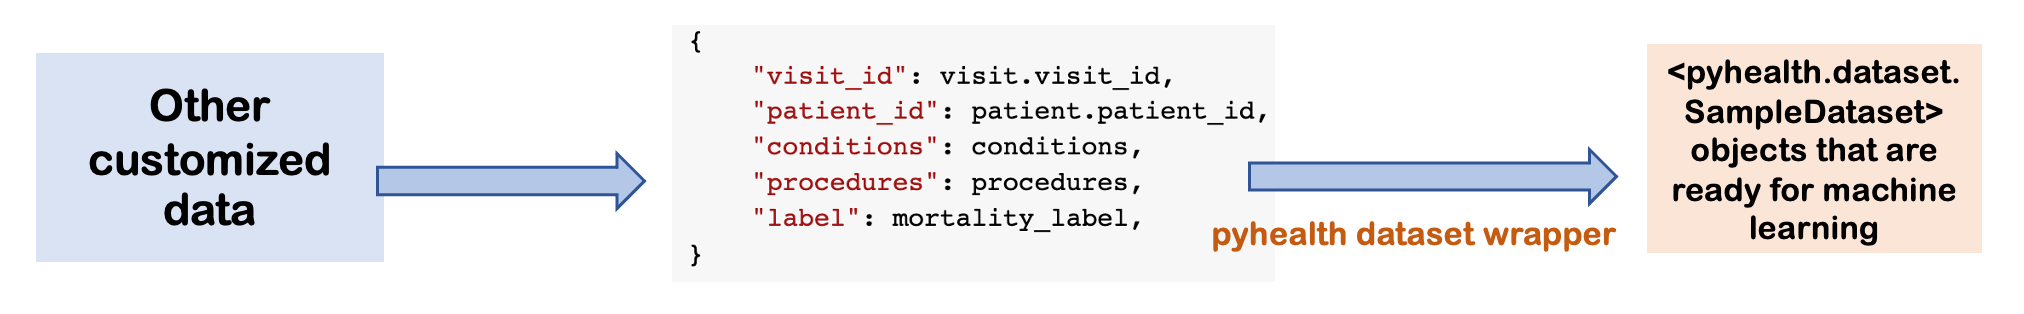

In [ ]:
from pyhealth.datasets import SampleDataset

samples = [
    {
        "patient_id": "patient-0",
        "visit_id": "visit-0",
        "single_vector": [1, 2, 3],
        "list_codes": ['505800458', '50580045810', '50580045811'], # NDC
        "list_vectors": [[1.0, 2.55, 3.4], [4.1, 5.5, 6.0]],
        "list_list_codes": [['A05B', 'A05C', 'A06A'], ['A11D', 'A11E']], # ATC-4
        "list_list_vectors": [[[1.8, 2.25, 3.41], [4.50, 5.9, 6.0]], [[7.7, 8.5, 9.4]]],
        "label": 1,
    },
    {
        "patient_id": "patient-0",
        "visit_id": "visit-1",
        "single_vector": [1, 5, 8],
        "list_codes": ['55154191800', '551541928', '55154192800', '705182798', '70518279800'],
        "list_vectors": [[1.4, 3.2, 3.5], [4.1, 5.9, 1.7]],
        "list_list_codes": [['A04A', 'B035', 'C129'], ['A07B', 'A07C']],
        "list_list_vectors": [[[1.0, 2.8, 3.3], [4.9, 5.0, 6.6]], [[7.7, 8.4, 1.3]]],
        "label": 0,
    },
]

dataset = SampleDataset(samples=samples)

In [ ]:
# check the information of each attributes
dataset.input_info

{'patient_id': {'type': str, 'dim': 0},
 'visit_id': {'type': str, 'dim': 0},
 'single_vector': {'type': int, 'dim': 1, 'len': 3},
 'list_codes': {'type': str, 'dim': 2},
 'list_vectors': {'type': float, 'dim': 2, 'len': 3},
 'list_list_codes': {'type': str, 'dim': 3},
 'list_list_vectors': {'type': float, 'dim': 3, 'len': 3},
 'label': {'type': int, 'dim': 0}}

In [ ]:
# check the patient index collection
dataset.patient_to_index

{'patient-0': [0, 1]}

In [ ]:
# check the visit index collection
dataset.visit_to_index

{'visit-0': [0], 'visit-1': [1]}

In [ ]:
# get the first sample
dataset.samples[0]

{'patient_id': 'patient-0',
 'visit_id': 'visit-0',
 'single_vector': [1, 2, 3],
 'list_codes': ['505800458', '50580045810', '50580045811'],
 'list_vectors': [[1.0, 2.55, 3.4], [4.1, 5.5, 6.0]],
 'list_list_codes': [['A05B', 'A05C', 'A06A'], ['A11D', 'A11E']],
 'list_list_vectors': [[[1.8, 2.25, 3.41], [4.5, 5.9, 6.0]],
  [[7.7, 8.5, 9.4]]],
 'label': 1}

If you find it useful, please give us a star ⭐ (fork, and watch) at https://github.com/sunlabuiuc/PyHealth. 

Thanks very much for your support!